<!-- Build a CNN model for Bird species <br>
Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding and conservation. <br>
Dataset Link: https://www.kaggle.com/datasets/akash2907/bird-species-classification -->

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
#accessing dataset through kaggle using kaggle.json file imported in gdrive .
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading the dataset from kaggle
! kaggle datasets download -d akash2907/bird-species-classification

bird-species-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip bird-species-classification.zip

Archive:  bird-species-classification.zip
replace test_data/test_data/blasti/DSC_6396.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_

In [ ]:
 # Data augmentation and preprocessing
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
# Normalization for the test set and no augmentation
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
# Create train data generators
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 150 images belonging to 16 classes.


In [ ]:
# Create test data generators
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 157 images belonging to 16 classes.


In [ ]:
# Get the indices of each class in train dataset
train.class_indices  

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
# Define the image size
img_size=(224,224)


In [ ]:
# Build the improved CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train.class_indices), activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_steps_per_epoch = train.n // train.batch_size
test_steps_per_epoch = test.n // test.batch_size

In [ ]:
# Train the model
history = model.fit(
    train,
    epochs=20,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=test,
    validation_steps=test_steps_per_epoch
)


Epoch 1/20
4/4 [==============================] - 99s 27s/step - loss: 3.9266 - accuracy: 0.0763 - val_loss: 2.7067 - val_accuracy: 0.1484
Epoch 2/20
4/4 [==============================] - 92s 28s/step - loss: 2.6245 - accuracy: 0.1719 - val_loss: 2.6122 - val_accuracy: 0.1953
Epoch 3/20
4/4 [==============================] - 111s 34s/step - loss: 2.5473 - accuracy: 0.2288 - val_loss: 2.5839 - val_accuracy: 0.1406
Epoch 4/20
4/4 [==============================] - 87s 28s/step - loss: 2.4151 - accuracy: 0.2119 - val_loss: 2.5745 - val_accuracy: 0.2109
Epoch 5/20
4/4 [==============================] - 111s 34s/step - loss: 2.3675 - accuracy: 0.2627 - val_loss: 2.5182 - val_accuracy: 0.1875
Epoch 6/20
4/4 [==============================] - 109s 34s/step - loss: 2.2990 - accuracy: 0.2288 - val_loss: 2.5737 - val_accuracy: 0.2891
Epoch 7/20
4/4 [==============================] - 82s 25s/step - loss: 2.1227 - accuracy: 0.3390 - val_loss: 2.5332 - val_accuracy: 0.2500
Epoch 8/20
4/4 [========

In [ ]:
#save the model as bird.h5
model.save('bird.h5')

In [ ]:

# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img1 = image.load_img('/content/bird1.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 223ms/step
9
hsparo


In [ ]:
img1 = image.load_img('/content/bird3.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 26ms/step
5
gretit


4/4 [==============================] - 38s 10s/step - loss: 3.2281 - accuracy: 0.2500
Testing Loss: 3.2281
Testing Accuracy: 0.2500


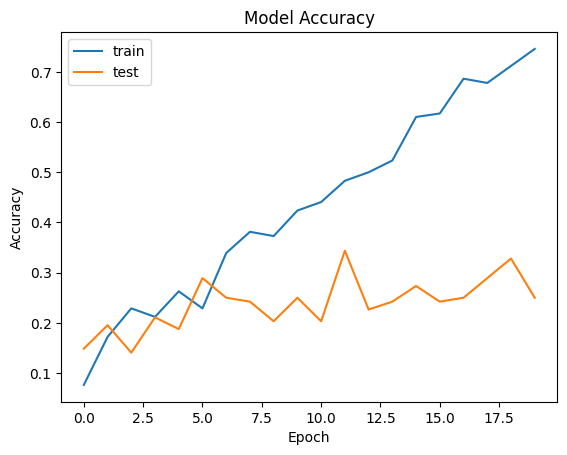

In [ ]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test, steps=test_steps_per_epoch)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set
predictions = model.predict(test)
y_pred = np.argmax(predictions, axis=1)
y_true = test.classes


5/5 [==============================] - 47s 9s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.07      0.03        15
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.10      0.14      0.12         7
           6       0.14      0.10      0.12        10
           7       0.12      0.16      0.14        19
           8       0.27      0.15      0.19        20
           9       0.33      0.11      0.17         9
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         7
          14       0.17      0.18      0.17        11
          15       0.10      0.10      0.10        10

    accuracy                           0.08       157
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
